<a href="https://colab.research.google.com/github/kamilest/oxwocs-girls-who-ml-2021/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GirlsWhoML 1: Linear regression

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#@title Loading data
from sklearn.utils import Bunch
from sklearn.datasets import load_iris

dataset = load_iris()
# Select a subset of points for simplicity
sample = [ 57, 122, 118,  53, 117,  81,  70, 142,  84,  16, 103,  82,  66, 31,  83]

petal_length = np.take(dataset.data[:, 2], sample)
petal_width = np.take(dataset.data[:, 3], sample)
iris_data = Bunch(data=petal_length, target=petal_width)

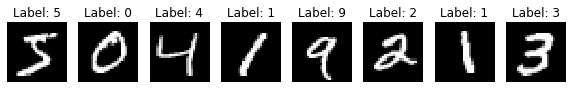

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    two_d = (np.reshape(image, (28, 28)))
    ax.imshow(two_d, cmap='gray', interpolation='none')
    ax.set_axis_off()

    # ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)
plt.savefig('mnist_discriminative.png', dpi=600)

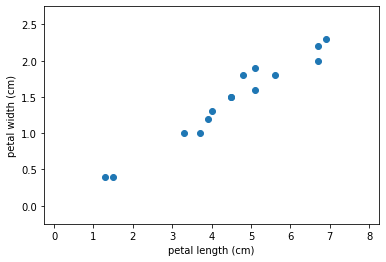

In [ ]:
plt.scatter(iris_data.data, iris_data.target)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.xlim([-0.25, 8.25])
plt.ylim([-0.25, 2.75])
plt.savefig('iris_scatter.png', dpi=600)
plt.show()

`sklearn` linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X=iris_data.data.reshape(-1, 1), y=iris_data.target)
print("Coefficient: {}, intercept: {}".format(reg.coef_[0], reg.intercept_))

Coefficient: 0.3397874212984903, intercept: -0.07130864531852943


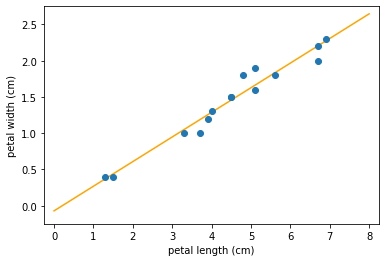

In [ ]:
x = np.linspace(0, 8, 100).reshape(-1, 1)
plt.plot(x, reg.predict(x), c='orange', zorder=0)
plt.scatter(iris_data.data, iris_data.target, zorder=1)
plt.xlim([-0.25, 8.25])
plt.ylim([-0.25, 2.75])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.savefig('iris_fitted.png', dpi=600)
plt.show()

Residuals

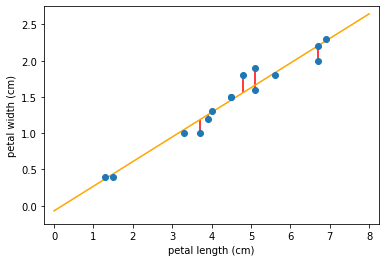

In [ ]:
x = np.linspace(0, 8, 100).reshape(-1, 1)
X = iris_data.data.reshape(-1, 1)
y = iris_data.target
y_pred = reg.predict(X)
plt.scatter(X, y, zorder=2)
plt.plot(x, reg.predict(x), c='orange', zorder=1)
plt.vlines(X, y, y_pred, colors='red', zorder=0)
plt.xlim([-0.25, 8.25])
plt.ylim([-0.25, 2.75])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.savefig('iris_residuals.png', dpi=600)
plt.show()

Residuals for a different slope

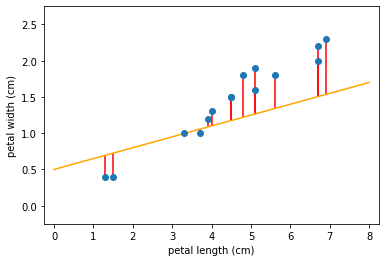

In [ ]:
x = np.linspace(0, 8, 100).reshape(-1, 1)
X = iris_data.data
y = iris_data.target
y_pred = 0.15 * X + 0.5
plt.scatter(X, y, zorder=2)
plt.plot(x, 0.15 * x + 0.5, c='orange', zorder=1)
plt.vlines(X, y, y_pred, colors='red', zorder=0)
plt.xlim([-0.25, 8.25])
plt.ylim([-0.25, 2.75])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.savefig('iris_residuals_subopt.png', dpi=600)
plt.show()

# Gradient descent

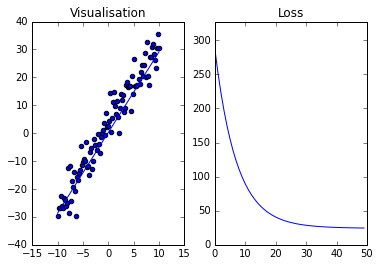

2.8910643607910256 0.2580041932818179


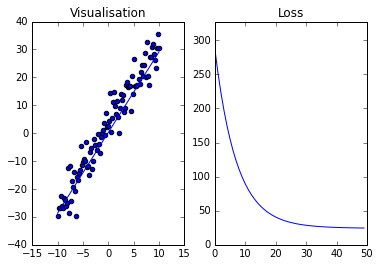

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display



plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


def generate_data(num_samples, x_lower_lim=-10, x_upper_lim=10):
    """
    @param num_samples number of samples to generate.
    @x_lower_lim lower limit for x
    @x_upper_lim upper limit for x
    This function generates the ground truth data.
    In real life we do not know the function below,
    but we will try and approximate it using MLE or MAP.
    """
    x = np.linspace(x_lower_lim, x_upper_lim, num_samples)
    y = 3 * x + 2 
    w = 4 * np.random.randn(num_samples) + 0
    y = y + w
    return x, y



class LinearRegression():
    def __init__(self, init_a, init_b):
        """
        This function is called initially, allowing us
        to set member variables for the class.
        @param init_a initiliasation for a
        @param init_b initiliasation for b
        """
        self.a = init_a
        self.b = init_b

    def _calc_gradient_at_x(self, x, y):
        """
        Calculates the gradients of the loss function
        wrt to the parameters at position x.
        """
        # y_pred = self.a * x + self.b        
        # grad_a = -2 * (x * (y - y_pred)).mean()
        # grad_b = -2 * (y - y_pred).mean()
        # return grad_a, grad_b

    def step(self, lr, x, y):
        """
        Updates the parameters.
        """
        # grad_a, grad_b = self._calc_gradient_at_x(x, y)
        # self.a = self.a - lr * grad_a
        # self.b = self.b - lr * grad_b

    def calc_loss(self, x, y):
        """
        Calculates the loss.
        """
        # return ((y - self.a * x - self.b)**2).mean()

    def set_up_vis(self, num_steps, x):
        self.losses = []
        self.steps = []
        self.pred_line, = ax1.plot(x, self.a * x + self.b, 'b-')
        ax2.plot(self.steps, self.losses, 'b-')
        ax2.set_xlim([0, num_steps])
        ax2.set_ylim([0, self.calc_loss(x, y)])

    def update_vis(self, x, y, step):
        self.losses.append(self.calc_loss(x, y))
        self.steps.append(step)
        del ax2.lines[-1]
        ax2.plot(self.steps, self.losses, 'b-')
        self.pred_line.set_ydata(self.a * x + self.b)
        fig.canvas.draw()
        fig.canvas.flush_events()
        display.clear_output(wait=True)
        display.display(plt.gcf())


    def train(self, num_steps, lr, x, y):
        """
        Training loop
        """
        self.set_up_vis(num_steps, x)
        for i in range(int(num_steps)):
            self.step(lr, x, y)
            self.update_vis(x, y, i)
            


x, y = generate_data(100)
ax1.scatter(x, y)
ax1.set_title("Visualisation")
ax2.set_title("Loss")


linear_regression = LinearRegression(0, 0)

grads = linear_regression.train(50, 1e-3, x, y)
print(linear_regression.a, linear_regression.b)
